In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
# 1
train_csv_data = pd.read_csv('train.csv')
train_csv_data['Sex'] = train_csv_data['Sex'].map({'male': 0, 'female': 1})

print("데이터 확인\n", train_csv_data.head(5))


데이터 확인
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [2]:
unique_counts = train_csv_data.nunique()
print(unique_counts)

print("데이터 분포도 확인\n", train_csv_data.describe())

cat_cols = ['Sex','Pclass','Embarked']
con_cols = ['Age','Fare','SibSp','Parch']
target_col = ['Survived']

print("카테고리 열",cat_cols)
print("연속적 열",con_cols)
print("타겟 열",target_col)

PassengerId    799
Survived         2
Pclass           3
Name           799
Sex              2
Age             85
SibSp            7
Parch            7
Ticket         625
Fare           234
Cabin          136
Embarked         3
dtype: int64
데이터 분포도 확인
        PassengerId    Survived      Pclass         Sex         Age  \
count   799.000000  799.000000  799.000000  799.000000  636.000000   
mean    400.000000    0.385482    2.304130    0.352941   29.870943   
std     230.795725    0.487014    0.837032    0.478184   14.555748   
min       1.000000    0.000000    1.000000    0.000000    0.670000   
25%     200.500000    0.000000    2.000000    0.000000   21.000000   
50%     400.000000    0.000000    3.000000    0.000000   28.000000   
75%     599.500000    1.000000    3.000000    1.000000   38.000000   
max     799.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  799.000000  799.000000  799.000000  
mean     0.518148    0.37296

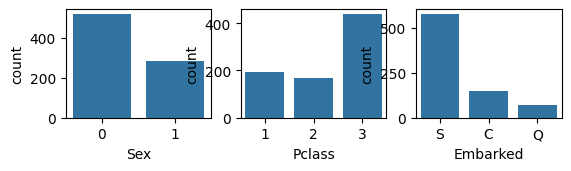

In [3]:
for i, feature in enumerate(cat_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=feature, data=train_csv_data)
    plt.ylabel('count', fontsize=10)
    plt.xlabel(feature, fontsize=10)
# 카테고리형 데이터의 개수 세려서 출력

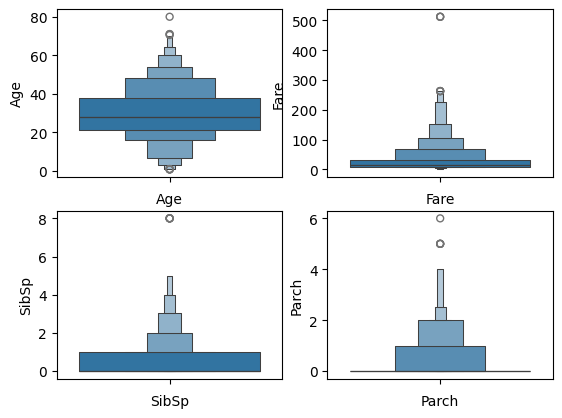

In [196]:
for i, feature in enumerate(con_cols, 1):
    plt.subplot(2,2,i)
    sns.boxenplot(y=feature, data=train_csv_data)
    plt.xlabel(feature, fontsize=10)
# 연속형 데이터 box plot 으로 시각화.

결측치 확인:
 Pclass      0
Age       163
SibSp       0
Parch       0
Sex         0
Fare        0
dtype: int64
[[<Axes: title={'center': 'Pclass'}> <Axes: title={'center': 'Age'}>]
 [<Axes: title={'center': 'SibSp'}> <Axes: title={'center': 'Parch'}>]
 [<Axes: title={'center': 'Sex'}> <Axes: title={'center': 'Fare'}>]]


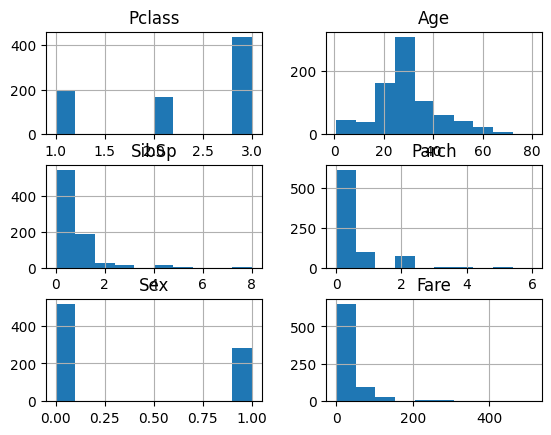

In [5]:
# 2
select_feature = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex','Fare']
print('결측치 확인:\n',train_csv_data[select_feature].isnull().sum())

X = train_csv_data[select_feature].fillna(train_csv_data[select_feature].mean())
y = train_csv_data['Survived']
print(X.hist())

In [6]:
# 3. model training 하기.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(penalty=None, C=0.0001, max_iter=100)
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

train_acc = accuracy_score(y_train, logreg.predict(X_train))
test_acc = accuracy_score(y_test, logreg.predict(X_test))

print("logistic regression의  train data set 정확도: ", train_acc)
print("logistic regression의  test data set 정확도: ", test_acc)

logistic regression의  train data set 정확도:  0.7887323943661971
logistic regression의  test data set 정확도:  0.84375


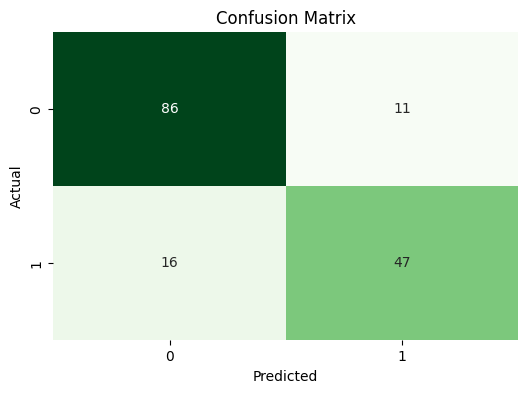

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Greens', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# 4. test set 생성
test_csv_data = pd.read_csv('test.csv')
test_csv_data['Sex'] = test_csv_data['Sex'].map({'male': 0, 'female': 1})

X_test_test = test_csv_data[select_feature]
# test 파일의 결측치는 train데이터의 정보로 채움
X_test_test = X_test_test.fillna(train_csv_data[select_feature].mean())
y_test_pred = logreg.predict(X_test_test)

submission = pd.DataFrame({
    "PassengerId": test_csv_data["PassengerId"],
    "Survived": y_test_pred
})
submission.to_csv('predict_test.csv', index=False)